In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Các thư viện Scikit-learn (sklearn) cho HỒI QUY
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Mô hình cơ sở
from sklearn.ensemble import RandomForestRegressor # Mô hình để tinh chỉnh
from sklearn.metrics import mean_squared_error, r2_score

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

# --- Tải Dữ liệu ---
file_path = 'real_estate_valuation_data.csv'
df = pd.read_csv(file_path)

print("Tải dữ liệu thành công!")

# --- Tiền xử lý nhanh ---
# Bỏ cột 'No' vì nó không phải là đặc trưng
df = df.drop('No', axis=1)
print("Đã bỏ cột 'No'. Dữ liệu sẵn sàng:")
print(df.head())

Tải dữ liệu thành công!
Đã bỏ cột 'No'. Dữ liệu sẵn sàng:
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1     

--- Yêu cầu 1: Biểu diễn dữ liệu ---


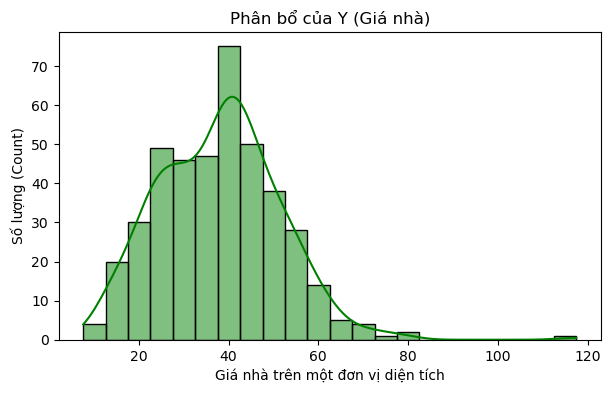

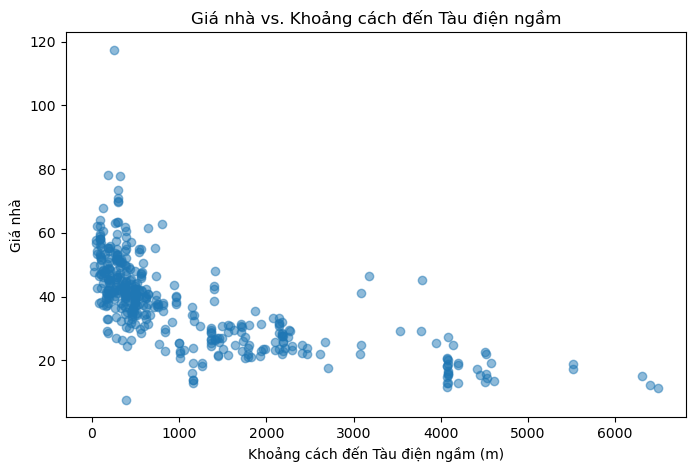

In [3]:
print("--- Yêu cầu 1: Biểu diễn dữ liệu ---")

# 1. Tách X (đặc trưng) và y (mục tiêu)
# X là 6 cột đầu, y là cột cuối cùng
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Vẽ biểu đồ phân bổ (Histogram) của cột mục tiêu 'y' (Giá nhà)
plt.figure(figsize=(7, 4))
sns.histplot(y, kde=True, color='green')
plt.title('Phân bổ của Y (Giá nhà)')
plt.xlabel('Giá nhà trên một đơn vị diện tích')
plt.ylabel('Số lượng (Count)')
plt.show() # [cite: 7892, 7929, 7933]

# 3. Vẽ biểu đồ Scatter plot (Phân tán)
# Xem mối quan hệ giữa 'X3 distance to MRT' và 'Y' (Giá nhà)
plt.figure(figsize=(8, 5))
plt.scatter(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'], alpha=0.5)
plt.title('Giá nhà vs. Khoảng cách đến Tàu điện ngầm')
plt.xlabel('Khoảng cách đến Tàu điện ngầm (m)')
plt.ylabel('Giá nhà')
plt.show() # [cite: 7892, 7929, 7933]

--- Yêu cầu 2 & 3: Huấn luyện và Đánh giá (Mô hình Linear Regression) ---
Đã chia và chuẩn hóa dữ liệu.
Đã huấn luyện xong mô hình LinearRegression.

--- Đánh giá Linear Regression ---
Mean Squared Error (MSE): 53.5056
Root Mean Squared Error (RMSE): 7.3148
R-squared (R2 Score): 0.6811


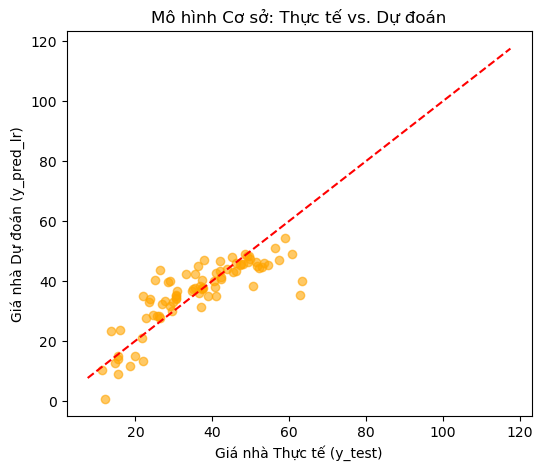

In [5]:
print("--- Yêu cầu 2 & 3: Huấn luyện và Đánh giá (Mô hình Linear Regression) ---")

# --- Chia dữ liệu ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Chuẩn hóa dữ liệu ---
# Đây là bước quan trọng để các đặc trưng có thang đo khác nhau
# (như X3: 0-6000 vs X4: 0-10) trở nên công bằng.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Đã chia và chuẩn hóa dữ liệu.")

# --- Yêu cầu 2: Huấn luyện mô hình ---
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
print("Đã huấn luyện xong mô hình LinearRegression.")

# --- Yêu cầu 3: Đánh giá mô hình ---
y_pred_lr = model_lr.predict(X_test_scaled)

# 3.1. Dùng Mean Squared Error (MSE) [cite: 8098]
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr) # RMSE là sai số trung bình (cùng đơn vị với Giá nhà)
print(f"\n--- Đánh giá Linear Regression ---")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")

# 3.2. Dùng R-squared (R2 Score)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared (R2 Score): {r2_lr:.4f}")

# 3.3. Vẽ biểu đồ dự đoán vs. thực tế [cite: 7892, 7929, 7933]
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # Đường tham chiếu y=x
plt.title('Mô hình Cơ sở: Thực tế vs. Dự đoán')
plt.xlabel('Giá nhà Thực tế (y_test)')
plt.ylabel('Giá nhà Dự đoán (y_pred_lr)')
plt.show()

--- Yêu cầu 4: Tinh chỉnh Mô hình (Grid Search với RandomForest) ---
(Mục tiêu: RMSE <= 6.0 | RMSE cơ sở: 7.3148)
Bắt đầu Grid Search cho RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Grid Search hoàn tất!
Các tham số tốt nhất tìm được: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}

--- Đánh giá Mô hình RandomForest Tốt nhất ---
Mean Squared Error (MSE): 29.6890
Root Mean Squared Error (RMSE): 5.4488
R-squared (R2 Score): 0.8230

CHÚC MỪNG! Đã đạt được giá trị kỳ vọng (RMSE <= 6.0)


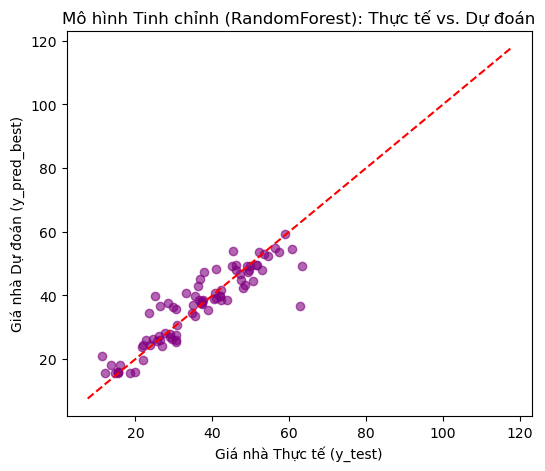

In [7]:
print("--- Yêu cầu 4: Tinh chỉnh Mô hình (Grid Search với RandomForest) ---")
print(f"(Mục tiêu: RMSE <= 6.0 | RMSE cơ sở: {rmse_lr:.4f})")

# 1. Định nghĩa không gian tham số (param_grid)
param_grid = {
    'n_estimators': [50, 100, 200], # Số lượng cây
    'max_depth': [None, 10, 20],     # Độ sâu tối đa
    'min_samples_leaf': [1, 2, 4]  # Số mẫu tối thiểu ở mỗi lá
}

# 2. Khởi tạo GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           verbose=1)

print("Bắt đầu Grid Search cho RandomForest...")
# Lưu ý: RandomForest không bắt buộc dùng dữ liệu đã chuẩn hóa (scaled)
# Chúng ta sẽ dùng X_train gốc (chưa scale) để huấn luyện
grid_search.fit(X_train, y_train)

# 3. In ra kết quả tốt nhất
print("\nGrid Search hoàn tất!")
print(f"Các tham số tốt nhất tìm được: {grid_search.best_params_}")

# 4. Lấy mô hình tốt nhất
best_model_rf = grid_search.best_estimator_

# --- Đánh giá lại mô hình TỐT NHẤT trên tập TEST ---
y_pred_best = best_model_rf.predict(X_test) # Dùng X_test gốc

print("\n--- Đánh giá Mô hình RandomForest Tốt nhất ---")
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.4f}") # <-- So sánh với mục tiêu
print(f"R-squared (R2 Score): {r2_best:.4f}")

if rmse_best <= 6.0:
    print("\nCHÚC MỪNG! Đã đạt được giá trị kỳ vọng (RMSE <= 6.0)")
else:
    print("\nCHƯA ĐẠT MỤC TIÊU.")
    
# Vẽ biểu đồ kết quả
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_best, alpha=0.6, c='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Mô hình Tinh chỉnh (RandomForest): Thực tế vs. Dự đoán')
plt.xlabel('Giá nhà Thực tế (y_test)')
plt.ylabel('Giá nhà Dự đoán (y_pred_best)')
plt.show()